In [2]:
import matplotlib.pyplot as plt

In [6]:
import matplotlib

## Memoria

El proyecto empieza con una idea muy diferente a la que acaba resultando, como pasa habitualmente en la mayoría de las entregas en las que hay un componente creativo, que cambia y avanza con el usuario a cargo del propio resultado. 
Utilizando mi *background* como artista musical (DJ) y con muchos años atrás de eventos y charlas coincidiendo con jóvenes promesas y aprendices de la materia, se me ocurrió crear una herramienta que consistiera en, empleando una biblioteca musical concreta (*playlist*), crear un modelo que nos proporcionara cuál sería la mejor opción de pista siguiente a la que hemos escogido por su similitud tonal. 
Es decir, siguiendo la escala, el programa nos escogería las pistas que podríamos mezclar con la anterior por casamiento en sus melodías, para quitarnos de ese trabajo que requiere de tanta agilidad mental en los comienzos delante de una mesa de mezclas, donde normalmente estamos mucho más ocupados buscando los botones que tenemos que tocar, que pensando en cómo era o se llamaba la canción que creo que pegaría justo después. Lo que es básicamente el *esfuerzo* del DJ. 

**Buscando información**, datos y artículos, me di cuenta de que quería hacer algo que requiriera mucho más que redirigir contenido hacia un lado u otro dependiendo de una categoría concreta (el *key* era lo que íbamos a utilizar en el caso mencionado). Un problema que recaía en boca de varios, era la posibilidad de predecir algo que fuera aún más útil y creara impacto: la popularidad de una canción. 

Al toparme con la API de Spotify, me encontré con millones de datos a los que podemos acceder de forma abierta, con unos datasets que basan cada pieza musical en una serie de atributos muy interesantes que ellos definen, y que están explicados y reflejados en el código principal del proyecto (energy, danceability, speechiness). Todos podían influir de alguna forma en qué puesto acababan en el ranking musical de cualquier plataforma, así que decidí ahondar mucho más en eso. 

Para ello, encontré varios datasets que fui concatenando con el fin de unir canciones virales (de RRSS como TIK TOK), canciones de top anual, o canciones nada populares para hacer contraste. 

La **limpieza del dato** fue la parte más exhaustiva, teniendo que transformar la mayoría de las variables para ver si podía obtener un mejor resultado, porque las correlaciones con el target desde primera instancia fueron mínimas. Para ello asigné valores numéricos a *string* como los géneros musicales o la escala. También tuve que seccionar parte del texto de título de track, por ejemplo, buscando palabras que se repitieran que pudieran crear un patrón a la hora de hacer a una canción popular a nivel mundial. 

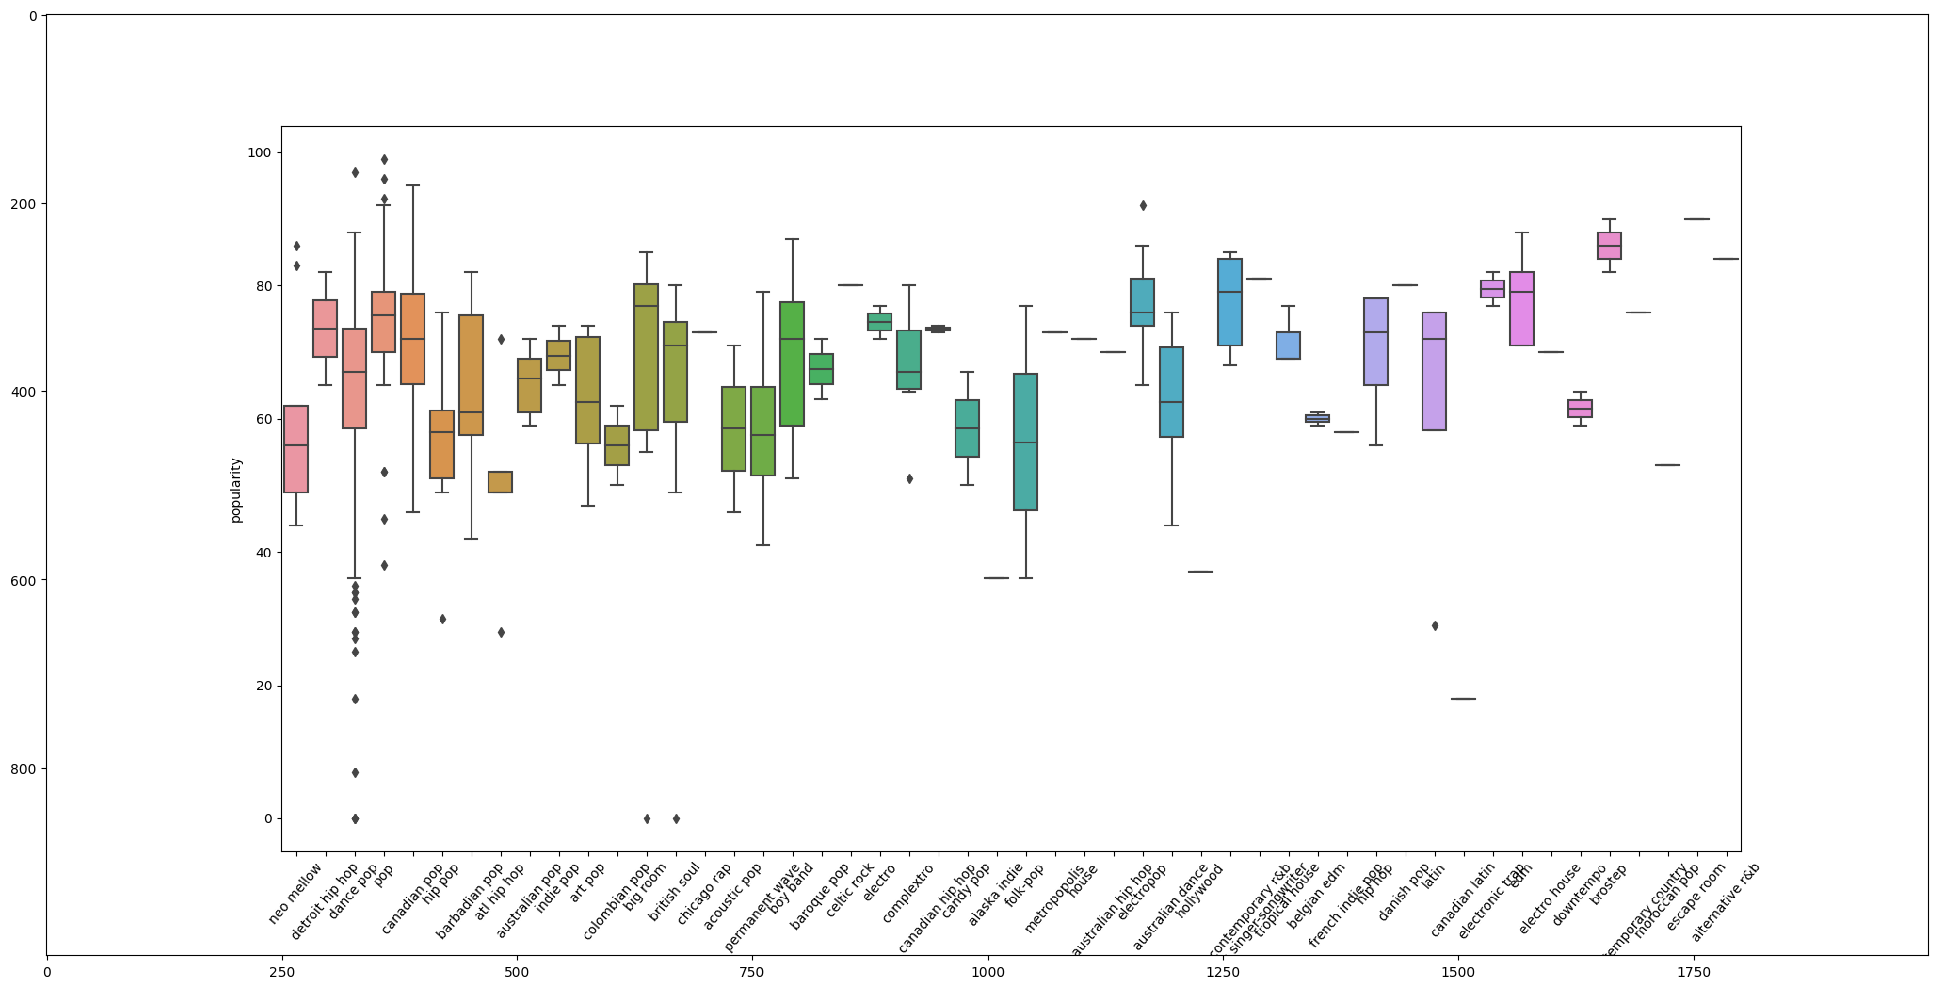

In [11]:
from skimage import io
 
img = io.imread("../img/boxplot_music_genre.png")
plt.figure(figsize=(20,10))
io.imshow(img);

Llegué a unir hasta cuatro datasets diferentes, cada uno con su limpieza pertinente, cuando me dí cuenta de que las correlaciones seguían sin aumentar, decidí tomar una última decisión: en lugar de predecir un dígito de popularidad para una canción (en función del resto de sus atributos), quería volverlo una problemática de **clasificación**: es popular o no lo es. Así, y comparando con el anterior dataset en el que nos enfrentábamos a un conflicto de regresión, me topé con unas relaciones considerables y mucho más interesantes. 

Lo siguiente fue probar todos los modelos que pude relacionados con la problemática que quería solventar. Empecé con un Pipeline para hacerme una idea de cuáles eran las mejores apuestas que tenía que hacer, luego fui mejorando sus parámetros, probé con Voting Classifier, tanto *hard* como *soft*, y de forma individual y personalizada uno de los que más he disfrutado y mejor me parece que generalizan con una eficacia en tiempo brutal: *XGBoost Classifier* que sería por el que me acabaría decantando. 
Puesto que empecé jugando mucho con un *Random Forest* que perfeccioné tanto que acabé cayendo en *overfitting* irreparable. 

En la búsqueda de mi mejor modelo, también probé a escalar mis datos pero sin mucha mejora, en los testeos que hice no conseguí un resultado notorio, considerando que mis datos estaban en su mayoría en un baremo de por sí entre 0 y 1, que son los grados que da el propio Spotify para medir los atributos de una canción que hemos tomado como features. 

Finalmente, saqué algunas gráficas que demostraban la buena performance que estaba haciendo mi XGBClassifier, un trabajo muy bueno a la hora de generalizar, entre unas matrix de confusión que comparé con las de Random Forest, el único competidor que tenía, ahí es donde caí en que XGB funcionaría mucho mejor ante datos nuevos, dado que la diferencia no era muy grande y RF se estaba ciñendo demasiado a los datos de entreno.

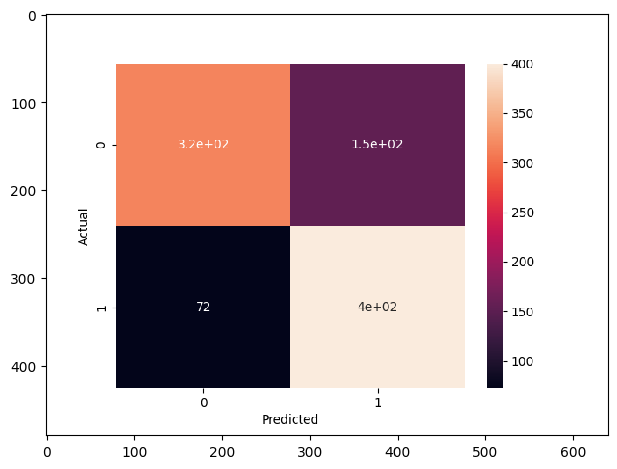

In [14]:
from skimage import io
 
img = io.imread("../img/confusion_matrix_xgb.png")
io.imshow(img);

Mi predicción da unas respuestas bastante buenas en el trabajo que se le ha encomendado a la hora de basarse en las features para decidir si una canción será o no popular en función de los análisis de Spotify de los tracks del momento. 